<center><img src="https://uploads-ssl.webflow.com/61e7e0262a578339c0493a38/61eade820b4b75571c63391b_GeekBrains.svg">



### Факультет Data Science в медицине
---
## Анализ покупательских данных и прогноз суммы покупок
### *Курсовой проект к уроку "Библиотеки Data Science для машинного обучения"* <br></center>

<div><right>Студент: Филистеев Илья nihith88@yandex.ru<br>
Дата сдачи: 18 декабря 2022 г.</right></div>

<strong>r2 Score: 66.07

Wall time: 3min 7s
</strong>

<center> <h1>Структура проекта:</h1> </center>

1. Описание задачи.
2. Описание датасета.
3. Подготовка и исследование данных.
4. Обучение модели.
5. Проверка качества модели.

<center> <h3>1. Описание задачи</h3> </center>

Анализ данных и построение корректного прогноза, учитывающего
данные о продажах и влияние признаков, таких как цены и различные
события, сильно влияют на планирование всего бизнеса. Практическая
значимость заключается в том, что метод, предложенный в результате
исследования, выявляет и учитывает закономерности между объемами
продаж и признаками при построении прогноза. Повышается качество
прогноза, которое положительно влияет на планирование бизнеса и
принятие решений в неопределенных условиях.


Цель исследования - разведочный анализ данных, построение оптимальной модели прогнозирования объема продаж.

<center> <h3>2. Описание датасета</h3> </center>


Для проекта используется предложенный датасет "Black Friday sales" который предварительно разбит на тренировочный и тестовый.

Описание полей датасета:
* User_ID - идентификационный номер покупателя
* Product_ID - идентификационный номер товара
* Age - возраст покупателя
* Occupation - род деятельности покупателя
* City_Category - город проживания
* Stay_In_Current_City_Years - как долго покупатель живет в этом городе
* Marital_Status - семейное положение покупателя
* Product_Category_1 - категория товара 1
* Product_Category_2 - категория товара 2
* Product_Category_3 - категория товара 3
* Purchase - сумма покупок 
#### Purchase - Целевой признак

<center> <h4>Ознакомимся с датасетом детальнее</h4> </center>

In [67]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import warnings
warnings.filterwarnings('ignore')

In [68]:
import numpy as np
import pandas as pd

In [69]:
test_data = pd.read_csv('input/test.csv', sep=',')
train_data = pd.read_csv('input/train.csv', sep=',')

In [70]:
print(f' Форма тестового: {test_data.shape}, тренировочного: {train_data.shape}')

 Форма тестового: (20000, 11), тренировочного: (80000, 12)


Общий датасет разделен в пропорции 20% на тест, 80% на тренировочный. В тестовом датасете целевой признак "Purchase" отсутствует.

In [71]:
train_data.head(3)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1004085,P00075742,F,26-35,6,A,1,0,8,14.0,NaN,7803
1,1005491,P00234842,M,18-25,7,A,1,0,5,6.0,16.0,6903
2,1003499,P00220142,M,26-35,3,A,2,0,1,15.0,NaN,15773


In [72]:
test_data[3:6]

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
3,1005213,P00270242,M,18-25,0,C,2,0,8,NaN,NaN
4,1002374,P00106042,M,26-35,14,B,2,0,5,NaN,NaN
5,1002820,P00182242,F,36-45,0,A,2,0,1,5.0,6.0


<center> <h3>3. Подготовка и исследование данных</h3> </center>

Произведем анализ датасета на пропуски данных

In [73]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User_ID                     80000 non-null  int64  
 1   Product_ID                  80000 non-null  object 
 2   Gender                      80000 non-null  object 
 3   Age                         80000 non-null  object 
 4   Occupation                  80000 non-null  int64  
 5   City_Category               80000 non-null  object 
 6   Stay_In_Current_City_Years  80000 non-null  object 
 7   Marital_Status              80000 non-null  int64  
 8   Product_Category_1          80000 non-null  int64  
 9   Product_Category_2          54892 non-null  float64
 10  Product_Category_3          24331 non-null  float64
 11  Purchase                    80000 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 7.3+ MB


Признаки 8 и 9 имеют пропуски данных. Для того, чтобы заполнить недостающие данные необходимо проверить данные в столбцах 8 и 9 на наличие выбросов или других аномалий данных.

In [74]:
train_data.describe() # Ничего подозрительного...

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,8.000000e+04,80000.000000,80000.000000,80000.000000,54892.000000,24331.000000,80000.000000
mean,1.003023e+06,8.086863,0.409388,5.388463,9.851873,12.676421,9243.933162
std,1.728959e+03,6.536459,0.491724,3.922793,5.079163,4.109343,5021.298356
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001503e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5679.750000
50%,1.003067e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8039.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12046.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [75]:
def fill_data(df, feature):
    """
    Функция fill_data заполняет пропуски данных нулями. В качестве аргументов
    передаем объект df (датафрейм), переменную feature (признак)
    Функция возвращает объект df (датафрейм)
    """
    df[feature].fillna(0, inplace = True)
    return df
fill_data(train_data, 'Product_Category_2')
fill_data(train_data, 'Product_Category_3')
print('-'*15, 'пропуски заполнены', '-'*15)

--------------- пропуски заполнены ---------------


<center> <h4>Почему заполнили пропуски именно нулями? </h4> </center>

Вероятнее всего, пропуски данных в признаках Product_Category_2, Product_Category_3 указывают на то, что полкупатель не совершал покупки товаров из этих категорий. Следует принять отсутсвие какого-либо количественного показателя покупки за ноль.

In [76]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User_ID                     80000 non-null  int64  
 1   Product_ID                  80000 non-null  object 
 2   Gender                      80000 non-null  object 
 3   Age                         80000 non-null  object 
 4   Occupation                  80000 non-null  int64  
 5   City_Category               80000 non-null  object 
 6   Stay_In_Current_City_Years  80000 non-null  object 
 7   Marital_Status              80000 non-null  int64  
 8   Product_Category_1          80000 non-null  int64  
 9   Product_Category_2          80000 non-null  float64
 10  Product_Category_3          80000 non-null  float64
 11  Purchase                    80000 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 7.3+ MB


In [77]:
cat_cols = list(train_data.columns)[2:-1]
print(cat_cols)
train_data = train_data.drop(['User_ID'], axis=1)

['Gender', 'Age', 'Occupation', 'City_Category', 'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3']


In [78]:
for feature in train_data:
    print(f'{feature}: {len(train_data[feature].unique())}')

Product_ID: 3256
Gender: 2
Age: 7
Occupation: 21
City_Category: 3
Stay_In_Current_City_Years: 5
Marital_Status: 2
Product_Category_1: 20
Product_Category_2: 18
Product_Category_3: 16
Purchase: 13314


In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

<center> <h4>Распределение признаков</h4> </center>

Сгенерируем новый признак, совмещающий в себе пол и семейное положение для более информативной визуализации.

In [80]:
train_data['Gender_Marriage'] = train_data.apply(lambda x: '%s_%s' % (x['Gender'], x['Marital_Status']), axis=1)

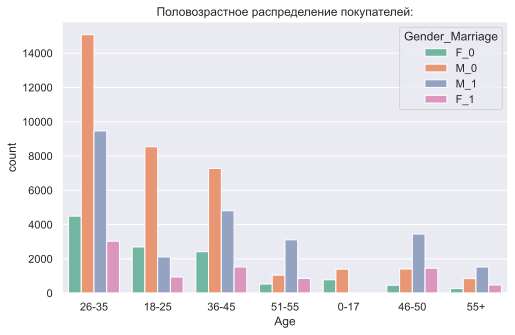

In [81]:
sns.set_style("darkgrid")
plt.figure(figsize=(8, 5))
plt.title('Половозрастное распределение покупателей:')
sns.countplot(x='Age', hue='Gender_Marriage', palette="Set2", data=train_data)
plt.show()

<center> <h4>Произведем визуальную оценку объема продаж по категориям товаров</h4> </center>

In [82]:
def buyer(pro_cat, num_cat):
    """"
    Функция buyer выполняет построение графиков. В качестве аргументов
    передаем объект переменну pro_cat (категория товара), переменную num_cat (номер категории)
    """
    plt.figure(figsize=(8, 5))
    plt.title(f'Объем продаж товаров из категории {num_cat}')
    sns.countplot(x=pro_cat, hue='Gender_Marriage', palette='Set2', data=train_data)
    plt.show()

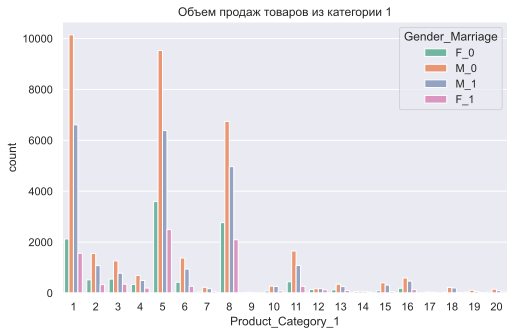

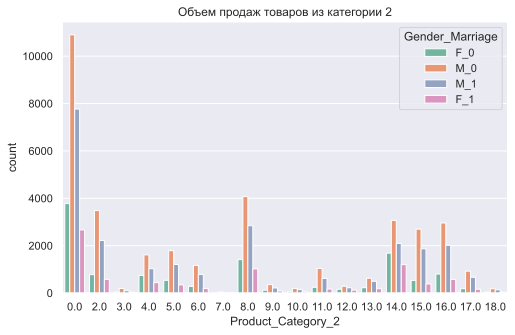

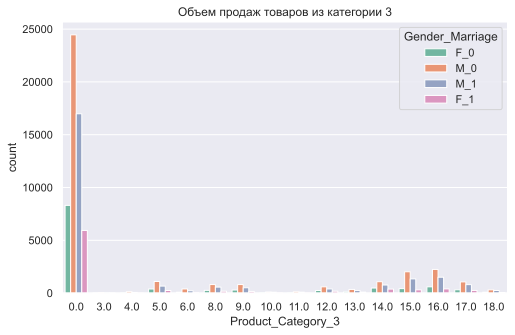

In [83]:
for i in range(1, 4):
    buyer(f'Product_Category_{i}', i)

Судя по графику признак Product_Category_3 вообще ни на что не повлияет...

<strong> Наиболее значимые группы покупателей:</strong>

* Мужчины от 18 до 45 лет независимо от семейного положения.


<strong> Наиболее значимые категории товаров:</strong>

* По категории 1: позиции 1, 5, 8.
* По категории 2: позиции 2, 8, 14-16.

<center> <h3>4. Выбор алгоритма и обучение модели.</h3> </center>

Перед нами стоит задача прогнозирования непрерывного признака. Для её решения воспользуемя алгоритмом линейной регрессии RandomForestRegressor.

In [95]:
"""
для дальнейших вычислений данные необходимо привести к численному значению.
Gender, Age, City_Category,  Stay_In_Current_City_Years 
"""
Gender_map = {'M': 0, 'F': 1}
Age_map = {'0-17':0, '18-25':1, '26-35':2, '36-45':3, '46-50':4, '51-55':5, '55+':6}
City_Category_map = {'A':0, 'B':1, 'C':2}
Stay_In_Current_City_Years_map = {'0':0, '1':1, '2':2, '3':3, '4+':4}

train_data['Gender_m'] = train_data['Gender'].map(Gender_map)
train_data['Age_m'] = train_data['Age'].map(Age_map)
train_data['City_m'] = train_data['City_Category'].map(City_Category_map)
train_data['Stay_m'] = train_data['Stay_In_Current_City_Years'].map(Stay_In_Current_City_Years_map)

df = train_data.drop(['Gender', 'Age', 'City_Category',  'Stay_In_Current_City_Years'], axis=1)
df.head()

,Product_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Gender_Marriage,Gender_m,Age_m,City_m,Stay_m
0,P00075742,6,0,8,14.0,0.0,7803,F_0,1,2,0,1
1,P00234842,7,0,5,6.0,16.0,6903,M_0,0,1,0,1
2,P00220142,3,0,1,15.0,0.0,15773,M_0,0,2,0,2
3,P00211242,3,0,8,12.0,0.0,8116,F_0,1,3,2,3
4,P00327142,0,0,8,15.0,0.0,6144,F_0,1,2,0,4


In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Product_ID          80000 non-null  object 
 1   Occupation          80000 non-null  int64  
 2   Marital_Status      80000 non-null  int64  
 3   Product_Category_1  80000 non-null  int64  
 4   Product_Category_2  80000 non-null  float64
 5   Product_Category_3  80000 non-null  float64
 6   Purchase            80000 non-null  int64  
 7   Gender_Marriage     80000 non-null  object 
 8   Gender_m            80000 non-null  int64  
 9   Age_m               80000 non-null  int64  
 10  City_m              80000 non-null  int64  
 11  Stay_m              80000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 7.3+ MB


In [107]:
# Удалим из датасета ненужные признаки
df_cols = list(df.columns)
del df_cols[6:8]
del df_cols[0]
print(df_cols)

['Occupation', 'Marital_Status', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3', 'Gender_m', 'Age_m', 'City_m', 'Stay_m']


In [108]:
X = pd.DataFrame(df, columns=df_cols) # датафрейм без целевого признака
X.head()

,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Gender_m,Age_m,City_m,Stay_m
0,6,0,8,14.0,0.0,1,2,0,1
1,7,0,5,6.0,16.0,0,1,0,1
2,3,0,1,15.0,0.0,0,2,0,2
3,3,0,8,12.0,0.0,1,3,2,3
4,0,0,8,15.0,0.0,1,2,0,4


In [109]:
y = pd.DataFrame(df['Purchase']) # Целевой признак
y.head()

,Purchase
0,7803
1,6903
2,15773
3,8116
4,6144


#### Разделим  дататсет на тренировочный и тестровый, 30% на тест.

In [110]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

#### Построение модели с использованием алгоритма Reandom Gprest Regressor

In [154]:
%%time
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=1000, max_depth=12, random_state=42)
model.fit(X_train, y_train.values[:, 0])

Wall time: 3min 7s


RandomForestRegressor(max_depth=12, n_estimators=1000, random_state=42)

#### Построим датасет из тестового и пронозированного целевого признака.

In [115]:
y_pred_model = model.predict(X_test)
check_test_model = pd.DataFrame({
    "y_test": y_test["Purchase"], 
    "y_pred_model": y_pred_model.flatten()})

check_test_model.head(12)

,y_test,y_pred_model
47044,13033,9523.940593
44295,8772,6278.040571
74783,12001,11915.712976
70975,6877,5974.436391
46645,13037,11706.299495
8215,12575,16026.150013
65509,7141,6473.511052
62715,3564,5980.919786
39859,1799,6009.270017
58834,19343,13279.861160


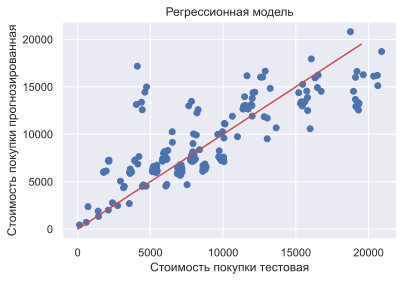

In [153]:
plt.scatter(check_test_model['y_test'][0:200], check_test_model['y_pred_model'][0:200])
q_x = np.arange(0, 20000, 500)
plt.plot(q_x, 1*q_x, color='r')
plt.xlabel('Стоимость покупки тестовая')
plt.ylabel('Стоимость покупки прогнозированная')
plt.title("Регрессионная модель")
plt.show()

#### Судя по графику имеются выбросы данных. Нужна более тщательная подготовка данных.

<center> <h3>5. Проверка качества модели.</h3> </center>

In [120]:
model.feature_importances_

array([0.02532919, 0.00530597, 0.88536103, 0.02232048, 0.01547662,
       0.00502403, 0.01681504, 0.01021202, 0.01415563])

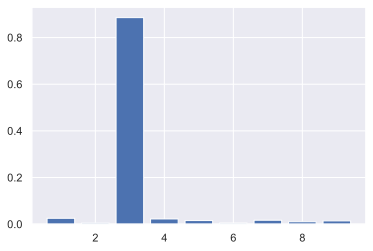

In [139]:
plt.bar([i for i in range(1, 10)], model.feature_importances_)
plt.show()

In [121]:
feature_importance = pd.DataFrame({'name':X.columns, 
                                   'feature_importance':model.feature_importances_}, 
                                  columns=['feature_importance', 'name'])
feature_importance

,feature_importance,name
0,0.025329,Occupation
1,0.005306,Marital_Status
2,0.885361,Product_Category_1
3,0.022320,Product_Category_2
4,0.015477,Product_Category_3
5,0.005024,Gender_m
6,0.016815,Age_m
7,0.010212,City_m
8,0.014156,Stay_m


In [145]:

from sklearn.metrics import r2_score
print("r2 Score:",round(r2_score(y_test, check_test_model["y_pred_model"])*100,2))

r2 Score: 66.07


#### Выводы.
1. В ходе выполнения проекта произведена предварительная подготовка и анализ данных. Объективно полагать, что подготовка произведена не в полном объеме, данные не стандартизированы, из выборки не исключены признаки, слабо или совсем не влияющие на результат моделирования.
2. Сложности возникли при разведоном анализе данных. Представление о корреляции одних данных с другими было слабым, было построено много неинформативной визуализации (впоследствии исключенной из проекта).
3. Сложностям в ходе выполнения работы способствовало полное отсутствие опыта анализа данных, общие поверхностные представления о принципах машинного обучения, недостаток практики работы с библиотеками машиного обучения и массивов данных.
4. Правильность полученных результатов оценить не могу.

<center><h4>Благодарю за внимание.</h4></center>